# Importing the Libraries

In [2]:
# Imports and Setup
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RandomizedSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

sns.set(style='whitegrid')

# Data Cleaning and Preprocessing

In [3]:
path = r"..\Datasets\Coffe_Sales.csv"
data = pd.read_csv(path)

In [4]:
data.tail(20)

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
3616,21/03/2025,21/03/2025 18:52:13,18,card,ANON-0000-0000-0507,R35.76,Latte,Night,Fri,Mar,5,3
3617,21/03/2025,21/03/2025 18:59:24,18,card,ANON-0000-0000-1170,R25.96,Americano,Night,Fri,Mar,5,3
3618,22/03/2025,22/03/2025 09:05:13,9,card,ANON-0000-0000-1274,R30.86,Americano with Milk,Morning,Sat,Mar,6,3
3619,22/03/2025,22/03/2025 10:30:09,10,card,ANON-0000-0000-1152,R30.86,Americano with Milk,Morning,Sat,Mar,6,3
3620,22/03/2025,22/03/2025 11:14:06,11,card,ANON-0000-0000-1259,R35.76,Hot Chocolate,Morning,Sat,Mar,6,3
3621,22/03/2025,22/03/2025 11:41:21,11,card,ANON-0000-0000-1279,R35.76,Cocoa,Morning,Sat,Mar,6,3
3622,22/03/2025,22/03/2025 12:18:27,12,card,ANON-0000-0000-1313,R30.86,Americano with Milk,Afternoon,Sat,Mar,6,3
3623,22/03/2025,22/03/2025 12:26:00,12,card,ANON-0000-0000-1306,R25.96,Americano,Afternoon,Sat,Mar,6,3
3624,22/03/2025,22/03/2025 13:06:22,13,card,ANON-0000-0000-1309,R25.96,Americano,Afternoon,Sat,Mar,6,3
3625,22/03/2025,22/03/2025 13:23:18,13,card,ANON-0000-0000-1267,R30.86,Americano with Milk,Afternoon,Sat,Mar,6,3


In [5]:
data.describe(include='all')

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
count,3636,3636,3636.000000,3636,3547,3636,3636,3636,3636,3636,3636.000000,3636.000000
unique,381,3636,NaN,2,1316,20,8,3,7,12,NaN,NaN
top,11/10/2024,01/03/2024 10:15:51,NaN,card,ANON-0000-0000-0012,R35.76,Americano with Milk,Afternoon,Tue,Mar,NaN,NaN
freq,26,1,NaN,3547,129,1014,824,1231,585,525,NaN,NaN
mean,NaN,NaN,14.166942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.847910,6.394664
std,NaN,NaN,4.227755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.975983,3.480686
min,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000
50%,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,6.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,10.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3636 non-null   object
 1   datetime     3636 non-null   object
 2   hour_of_day  3636 non-null   int64 
 3   cash_type    3636 non-null   object
 4   card         3547 non-null   object
 5   money        3636 non-null   object
 6   coffee_name  3636 non-null   object
 7   Time_of_Day  3636 non-null   object
 8   Weekday      3636 non-null   object
 9   Month_name   3636 non-null   object
 10  Weekdaysort  3636 non-null   int64 
 11  Monthsort    3636 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 341.0+ KB


In [7]:
# Convert 'date' and 'datetime' columns to datetime types
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

# Convert 'money' columns to float types
data['money'] = data['money'].str.replace('R', ' ').str.strip().astype(float)

# Check for any issues in conversion
print('Number of nulls in date :', data['date'].isnull().sum())
print('Number of nulls in datetime :', data['datetime'].isnull().sum())

# Drop rows where conversion failed if necessary
data = data.dropna(subset=['date', 'datetime'])

# Reset index after drop rows
data = data.reset_index(drop=True)

# Additional cleaning if necessary (e.g., trimming strings in categorical columns)
categorical_cols = ['cash_type', 'card', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']
for col in categorical_cols:
    data[col] = data[col].astype(str).str.strip()

# Confirm cleaned data
data.info()

Number of nulls in date : 2190
Number of nulls in datetime : 2190
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1446 non-null   datetime64[ns]
 1   datetime     1446 non-null   datetime64[ns]
 2   hour_of_day  1446 non-null   int64         
 3   cash_type    1446 non-null   object        
 4   card         1446 non-null   object        
 5   money        1446 non-null   float64       
 6   coffee_name  1446 non-null   object        
 7   Time_of_Day  1446 non-null   object        
 8   Weekday      1446 non-null   object        
 9   Month_name   1446 non-null   object        
 10  Weekdaysort  1446 non-null   int64         
 11  Monthsort    1446 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 135.7+ KB


# Exploratory Data Analysis

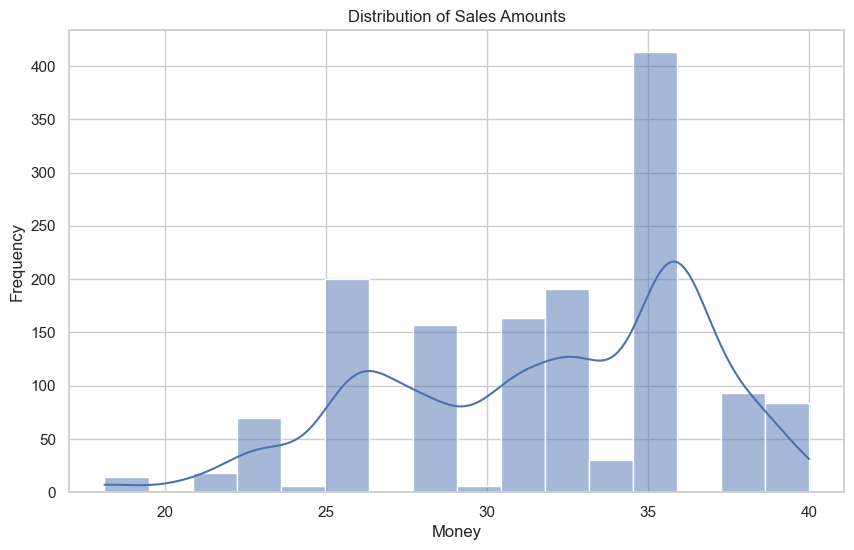

In [8]:
# Plot histogram for the money column to see distribution of sales amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['money'], kde=True)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.show()

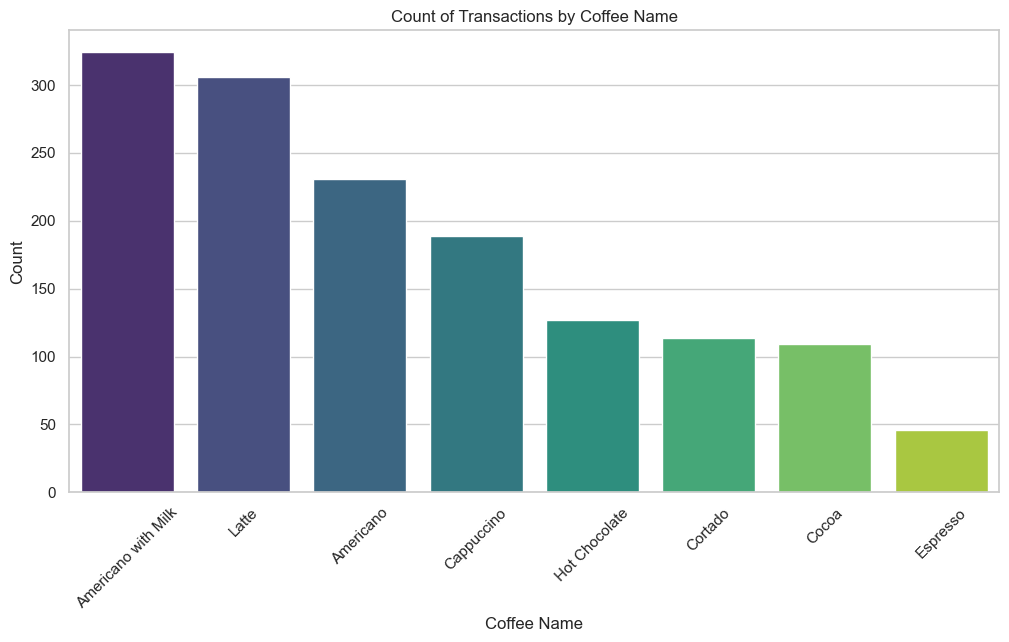

In [9]:
# Count plot for coffee_name to see the most popular coffees
plt.figure(figsize=(12,6))
sns.countplot(data=data, x=data['coffee_name'], order=data['coffee_name'].value_counts().index, palette='viridis')
plt.title('Count of Transactions by Coffee Name')
plt.xlabel('Coffee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

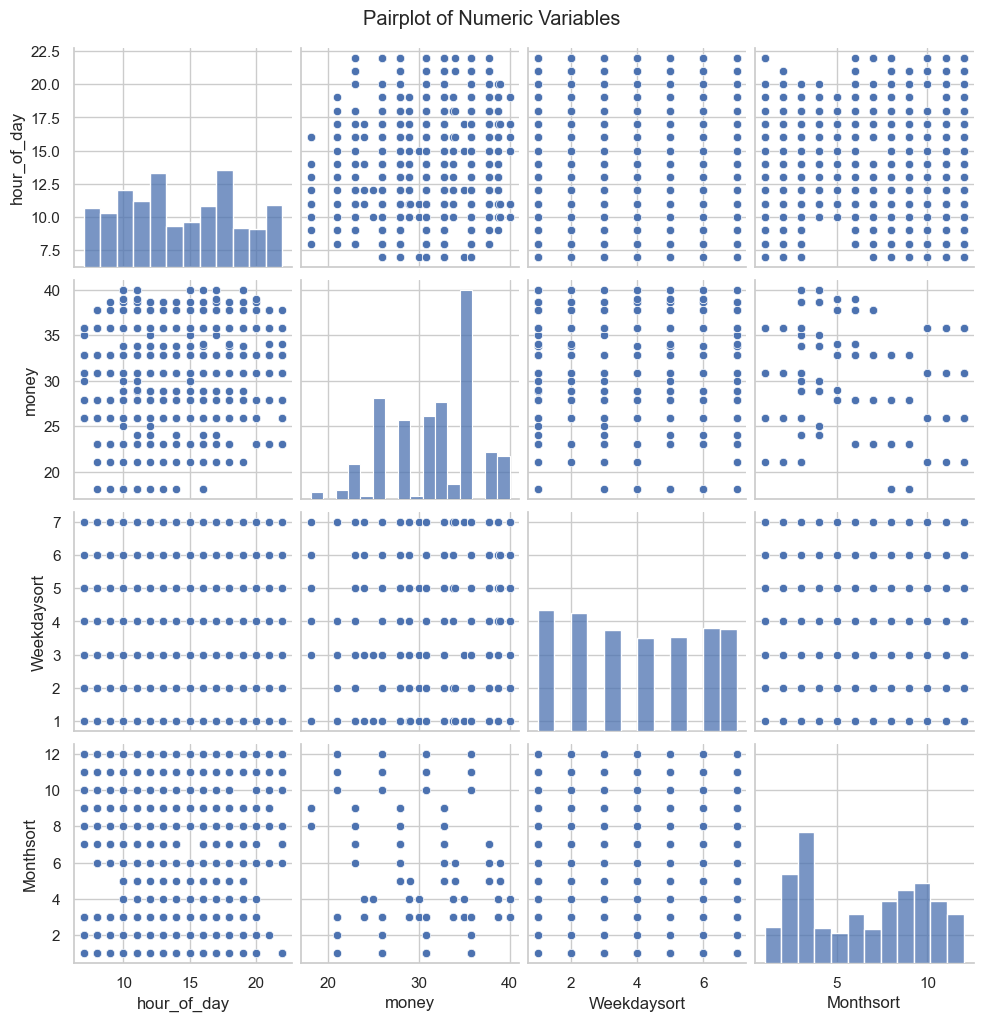

In [10]:
# Pair Plot among numeric columns
numeric_data = data.select_dtypes(include=[np.number])
if numeric_data.shape[1] >= 2:
    sns.pairplot(numeric_data)
    plt.suptitle('Pairplot of Numeric Variables', y=1.02)
    plt.show()

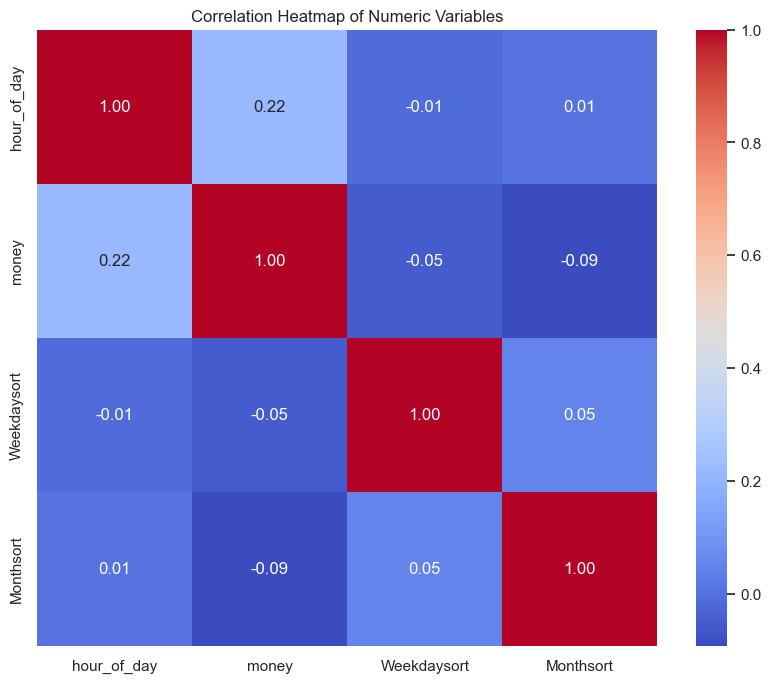

In [11]:
# Correlation Heatmap if there are 4 or more numeric columns
if numeric_data.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.show()

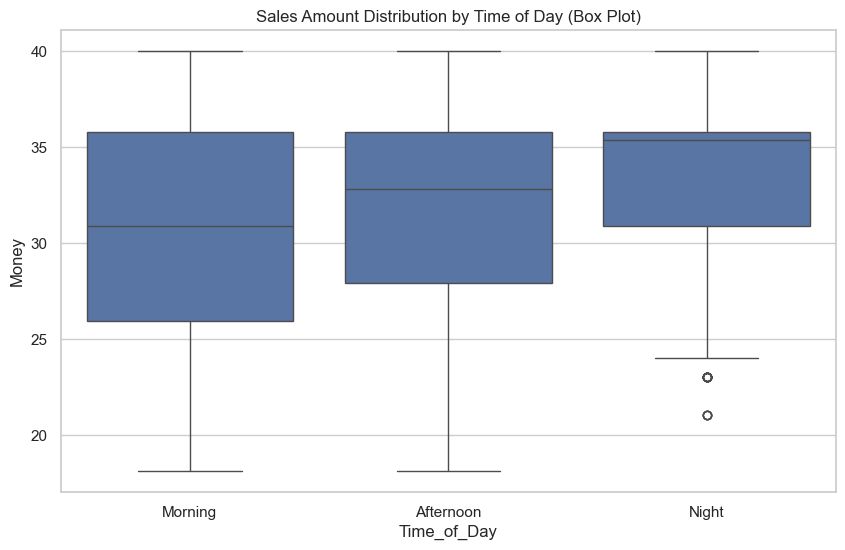

In [12]:
# Box Plot for 'money' across different Time_of_Day categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_of_Day', y='money', data=data)
plt.title('Sales Amount Distribution by Time of Day (Box Plot)')
plt.xlabel('Time_of_Day')
plt.ylabel('Money')
plt.show()

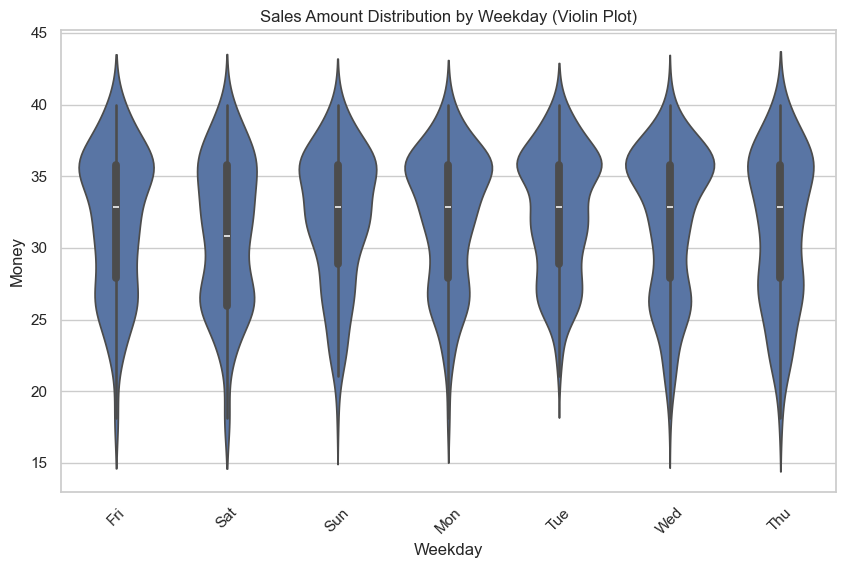

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Weekday', y='money', data=data)
plt.title('Sales Amount Distribution by Weekday (Violin Plot)')
plt.xlabel('Weekday')
plt.ylabel('Money')
plt.xticks(rotation=45)
plt.show()

# Predictive Model

In [14]:
data

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-01-03,2024-01-03 10:15:51,10,card,ANON-0000-0000-0001,38.70,Latte,Morning,Fri,Mar,5,3
1,2024-01-03,2024-01-03 12:19:23,12,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-01-03,2024-01-03 12:20:18,12,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-01-03,2024-01-03 13:46:33,13,card,ANON-0000-0000-0003,28.90,Americano,Afternoon,Fri,Mar,5,3
4,2024-01-03,2024-01-03 13:48:15,13,card,ANON-0000-0000-0004,38.70,Latte,Afternoon,Fri,Mar,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,2025-12-03,2025-12-03 18:10:34,18,card,ANON-0000-0000-1170,25.96,Americano,Night,Wed,Mar,3,3
1442,2025-12-03,2025-12-03 18:17:18,18,card,ANON-0000-0000-1264,35.76,Cocoa,Night,Wed,Mar,3,3
1443,2025-12-03,2025-12-03 18:24:40,18,card,ANON-0000-0000-1282,25.96,Americano,Night,Wed,Mar,3,3
1444,2025-12-03,2025-12-03 18:38:57,18,card,ANON-0000-0000-1158,35.76,Cappuccino,Night,Wed,Mar,3,3


In [15]:
# Check all unique data categorical columns
print(data['cash_type'].unique())
print(data['coffee_name'].unique())
print(data['Time_of_Day'].unique())

['card' 'cash']
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']
['Morning' 'Afternoon' 'Night']


In [16]:
# Select features and target variable
X = data[['cash_type','coffee_name','Time_of_Day','Weekday','Month_name','hour_of_day','Weekdaysort','Monthsort']].values
y = data['money'].values

# Encoding categorical features
ct = ColumnTransformer(transformers=[('encoding', OneHotEncoder(drop='first'), [0,1,2,3,4])], remainder='passthrough')
X = ct.fit_transform(X).toarray()

# Splitting the data into Train set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Modeling
model = XGBRegressor(n_jobs=-1,objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'r2 score: {r2_score(y_test,y_pred)}')
print(f'r2-adjust score: {1 - (1 - r2_score(y_test,y_pred)) * (X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)}')

r2 score: 0.9756001174828389
r2-adjust score: 0.972773876264635


In [17]:
# k-Fold Cross Validation to check Overfitting
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2', n_jobs=-1)
print("R² each fold:", scores)
print("Mean R²:", np.mean(scores))

R² each fold: [0.97560012 0.97934881 0.97725543 0.96064588 0.97343986]
Mean R²: 0.9732580184416288


In [18]:
# Create parameters tuning
parameters = {
    'n_estimators': [100, 200, 300],        # jumlah pohon
    'max_depth': [3, 5, 7, 10],             # kedalaman pohon
    'learning_rate': [0.01, 0.05, 0.1, 0.2],# seberapa besar update tiap iterasi
    'subsample': [0.7, 0.8, 1.0],           # proporsi data yang dipakai tiap pohon
    'colsample_bytree': [0.7, 0.8, 1.0],    # proporsi fitur yang dipakai tiap pohon
    'min_child_weight': [1, 3, 5],          # minimum bobot dalam satu leaf
    'gamma': [0, 0.1, 0.3, 0.5],            # threshold pemangkasan pohon
    'reg_alpha': [0, 0.01, 0.1],            # regularisasi L1
    'reg_lambda': [1, 1.5, 2]               # regularisasi L2
}
# Create Grid Search to find best Parameters
random_search = RandomizedSearchCV(estimator = model, param_distributions=parameters, n_iter=20, cv=kf, n_jobs=-1, verbose=2, scoring='r2')
random_search.fit(X_train, y_train)

# Best parameters to model
print("Best Params:", random_search.best_params_)
print("Best CV R²:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best CV R²: 0.976029271001741


In [19]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(r2_score(y_test, y_pred))

0.9778846987543637


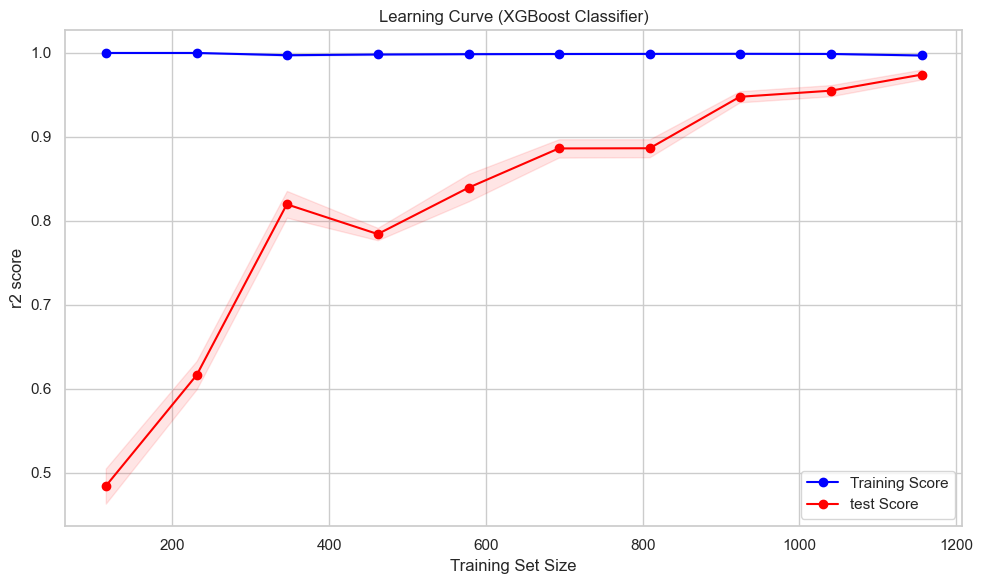

In [21]:
# Check train data and test data with learning curve
train_sizes, train_scores, test_scores = learning_curve(model,
                                                        X,
                                                        y,
                                                        cv=kf,
                                                        scoring='r2',
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
# Calculate mean and std dev in train and test set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='test Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='red')

plt.title('Learning Curve (XGBoost Classifier)')
plt.xlabel('Training Set Size')
plt.ylabel('r2 score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()